# Discovery of Optimal Quadrature Rules in Spline Spaces

In this notebook you can find some illustrative examples on how to use the method for discovering optimal quadrature rules described in the paper: *T. Teijeiro, A. Hashemian, J.M. Taylor and D. Pardo*, **Machine Learning Discovery of Optimal Quadrature Rules for Isogeometric Analysis**, 2023.

The full implementation of the method is available in the [`splinequadrature.py`](splinequadrature.py) module, and here we will rely on that functionality to show some examples of usage.

Let's start with some general imports:

In [4]:
import jax
import jax.numpy as jnp
#All calculations are done in double precision
jax.config.update("jax_enable_x64", True)

import numpy as np
from splinequadrature import splinesbfns, Constants, get_optimizer, fit_quadrature_rule

import matplotlib.pyplot as plt

## 1. Calculating a quadrature rule on a space with uniform elements

The first thing we need to do is to define our target space of basis functions. As an example, this will have degree 9, continuity 4, and 20 elements. We create it following the notation from the paper, and visualize all the basis functions:

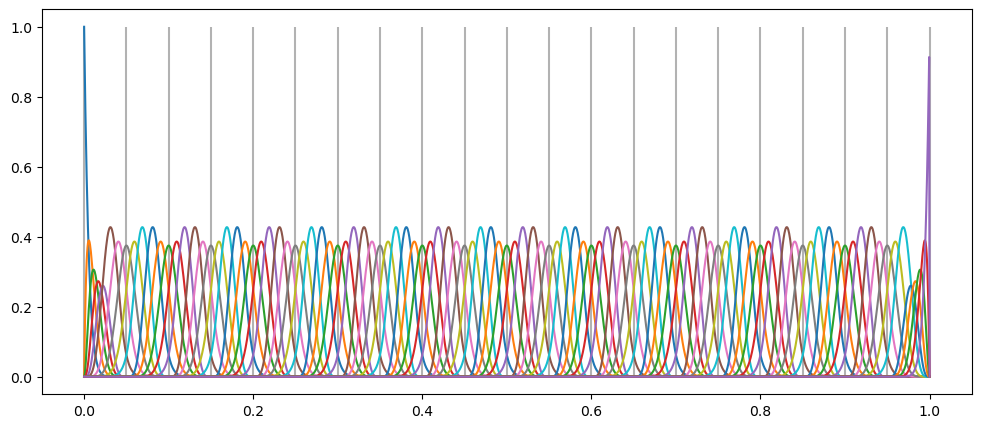

In [16]:
d = 9
k = 4
n_e = 20
partition = jnp.linspace(0, 1, n_e+1)
basis = splinesbfns(d, partition, k)
X = jnp.linspace(0, 1, 2000)
fig = plt.figure(figsize=(12, 5))
fig = plt.vlines(partition, 0, 1, alpha=0.3, color='k')
fig = plt.plot(X, basis(X).T)